<a href="https://colab.research.google.com/github/pankjb/Data-Science/blob/main/DL_MNIST_Handwritten_Image_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading mnist data

In [3]:
#data in mnist is already pre-processed

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images
Test data = 10000 images

image dimension: 28*28
grayscale image: 1 channel

In [6]:
print(X_train[10].shape)

(28, 28)


In [7]:
print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

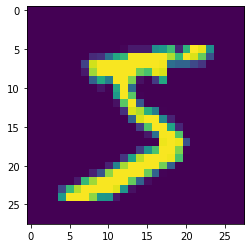

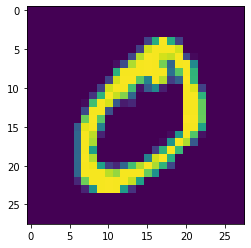

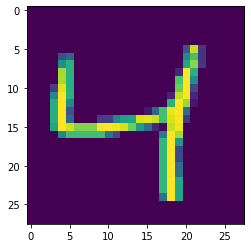

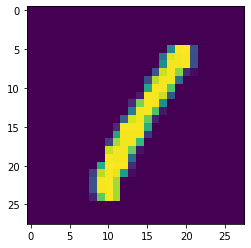

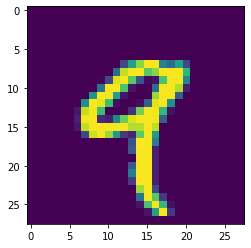

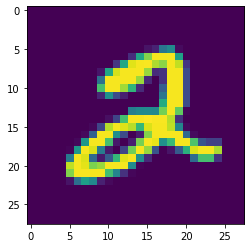

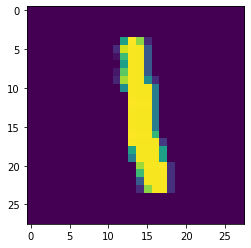

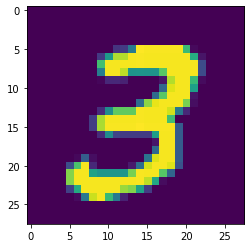

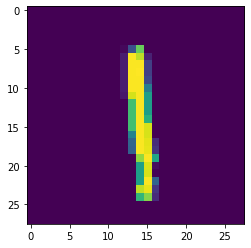

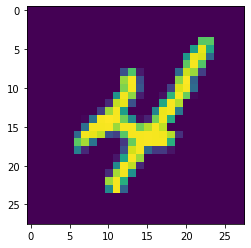

In [8]:
#displaying image
for i in range(0,10):
  plt.imshow(X_train[i])
  plt.show()

In [9]:
#unique values in y_train
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or apply One Hot Encoding

All the images have same dimensions in this dataset, if not, we have to resize all the images to common dimension

In [10]:
#scaling the values of pixels (which is in range of 0,255)

X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

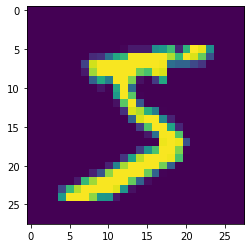

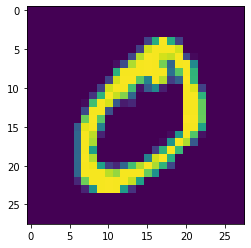

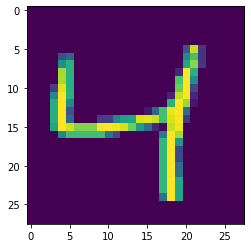

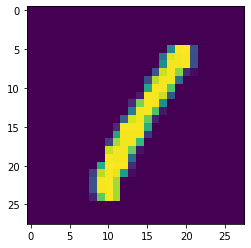

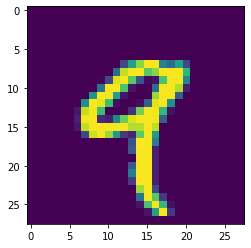

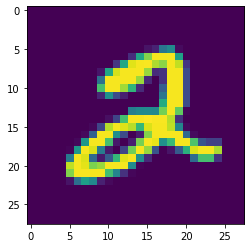

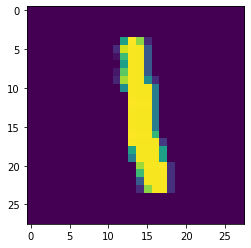

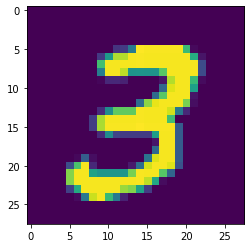

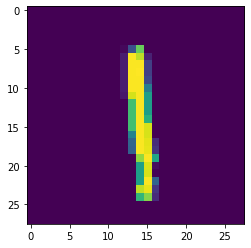

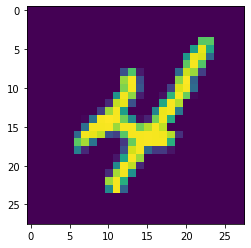

In [12]:
#displaying image
for i in range(0,10):
  plt.imshow(X_train[i])
  plt.show()

#Building Neural Network

In [13]:
#setting up layers of neural network

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [15]:
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [16]:
#training neural network
model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2995 - accuracy: 0.9132
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1427 - accuracy: 0.9580
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1043 - accuracy: 0.9685
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0691 - accuracy: 0.9785
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0501 - accuracy: 0.9836
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0450 - accuracy: 0.9853
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9868
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

Training Data Accuracy is 99.68%

Accuracy on Test Data

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1265 - accuracy: 0.9750
0.9750000238418579


Test Data Accuracy is 97.5%

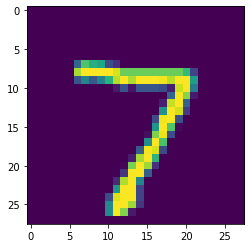

In [18]:
#first data point in test data
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[1.63038808e-03 8.86316158e-08 3.81376222e-02 9.99878585e-01
 8.35356950e-10 1.67900216e-04 1.18750733e-14 9.99999881e-01
 1.11845426e-01 9.98905122e-01]


model.predict() gives prediction probability of each class for that data point

In [23]:
#converting prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
#converting prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test -> true labels
Y_pred_labels -> Predicted labels

Confusion matrix

In [25]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 970    0    0    1    1    1    3    2    2    0]
 [   0 1123    1    3    0    1    4    0    2    1]
 [   4    7  994    6    6    1    2    7    5    0]
 [   0    0    8  980    0    6    0    4    2   10]
 [   0    1    1    0  963    0    6    0    1   10]
 [   3    0    0   75    1  804    1    0    3    5]
 [   5    1    0    1    4    9  933    0    5    0]
 [   0    6    9    9    2    0    0  984    1   17]
 [   4    2    7    5    2    7    3    6  927   11]
 [   1    0    0    3    9    4    0    1    2  989]], shape=(10, 10), dtype=int32)


Text(0.5, 51.0, 'Predicted Digit')

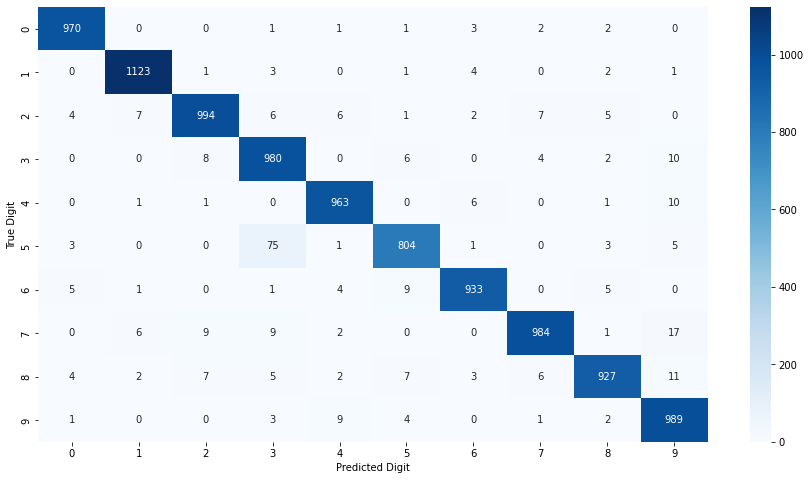

In [27]:
plt.figure(figsize = (15, 8))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Digit')
plt.xlabel('Predicted Digit')

#Predicting by giving Image as Input

In [106]:
input_image_path = '/content/download.png'


In [107]:
input_image_1 = cv2.imread(input_image_path)

In [108]:
type(input_image_1)

numpy.ndarray

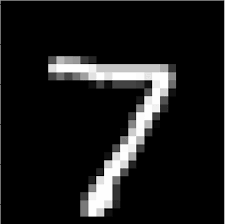

In [109]:
cv2_imshow(input_image_1)

In [110]:
input_image_1.shape

(224, 225, 3)

In [111]:
grayscale_1 = cv2.cvtColor(input_image_1, cv2.COLOR_RGB2GRAY)

In [112]:
grayscale_1.shape

(224, 225)

In [113]:
input_image_1 = cv2.resize(grayscale_1, (28,28))
#resizing

In [114]:
input_image_1.shape

(28, 28)

In [115]:
cv2_imshow(input_image_1)

In [116]:
print(input_image_1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83 185 159 151  60  37   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 225 254 254 254 254 241 198 198 198 19

In [117]:
input_image_1 = input_image_1/255
#scaling the data

In [118]:
image_reshaped_1 = np.reshape(input_image_1, [1,28,28])
#as checking for just single array

In [119]:
print(image_reshaped_1)

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

In [120]:
input_prediction_1 = model.predict(image_reshaped_1)

1/1 [==============================] - 0s 22ms/step


In [121]:
print(input_prediction_1)

[[1.60026108e-03 9.32136359e-08 3.79626602e-02 9.99876559e-01
  8.97033170e-10 1.51429878e-04 1.19554796e-14 9.99999881e-01
  1.14682667e-01 9.98928070e-01]]


In [122]:
input_pred_label_1 = np.argmax(input_prediction_1)
print(input_pred_label_1)

7


not showing right result

#Predictive System

Path of image to be predicted:/content/download (1).png


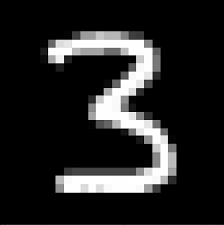

1/1 [==============================] - 0s 24ms/step
[[2.4519200e-19 8.2770915e-04 9.9556106e-01 1.0000000e+00 6.7209084e-16
  2.0430556e-03 4.7627819e-17 1.5805213e-02 8.4083980e-01 3.6445841e-01]]
Digit is  3


In [88]:
input_image_path = input('Path of image to be predicted:')
input_image_new = cv2.imread(input_image_path)
cv2_imshow(input_image_new)

grayscale_new = cv2.cvtColor(input_image_new, cv2.COLOR_RGB2GRAY)
input_image_resize_new = cv2.resize(grayscale_new, (28,28))
input_image_resize_new = input_image_resize_new/255
input_reshaped_new = np.reshape(input_image_resize_new, [1, 28, 28])
input_prediction_new = model.predict(input_reshaped_new)
print(input_prediction_new)
input_pred_label_new = np.argmax(input_prediction_new)
print('Digit is ', input_pred_label_new)